<b>Tasks:</b>
- Load data and transform featurs
- Compare linear regression and decision tree

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import seaborn as sns

df = fetch_california_housing(as_frame=True).frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
# Step 2. Check nulls
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [21]:
# Step 2. Normalization of Population
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [22]:
from sklearn.preprocessing import MinMaxScaler 

norm = MinMaxScaler()
np_population = np.array(df['Population']).reshape(len(df),1)
df['mm_Population'] = norm.fit(np_population).transform(np_population)

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,mm_Population
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,0.039869
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,0.031740
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,0.021974
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,0.032596
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,0.048264
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,1.000000


In [23]:
# Feature engineering 

# 1. Drop correlation and 
df = df.drop(columns=['AveRooms'])

# 2. Cleaning data from emissions
df = df[df['MedInc'] <= 9] #7.5  9
df = df[(df['AveBedrms'] <= 1.21) & (df['AveBedrms'] >= 0.88)]
df = df[df['Population'] <= 4000] # 2700  4000
df = df[(df['AveOccup'] <= 4.3) & (df['AveOccup'] >= 1.3)]
df = df[df['MedHouseVal'] <= 4.8]


def to_category(line):
    if line < 1:
        return 0
    elif line >= 1 and line < 2:
        return 1
    elif line >= 2 and line < 3:
        return 2
    elif line >= 3 and line < 4:
        return 3
    elif line >= 4 and line < 5:
        return 4
    elif line >= 5 and line < 6:
        return 5
    elif line >= 6 and line < 7:
        return 6
    elif line >= 7 and line < 8:
        return 7
    elif line >= 8 and line < 9:
        return 8
    else:
        return 9
    
df['MedHouseVal'] = df['MedHouseVal'].apply(lambda line: round(line,2))

In [24]:
df['MedHouseVal'].value_counts()

1.62    145
1.38    117
1.12    107
0.88    107
1.88    102
       ... 
4.80      1
0.37      1
0.30      1
0.15      1
0.35      1
Name: MedHouseVal, Length: 449, dtype: int64

In [25]:
# Step 3. Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['MedHouseVal']), df['MedHouseVal'], test_size=0.3, random_state=42)

In [26]:
#Step 4 and 5. Getting a LinearRegression score
from sklearn.linear_model import LinearRegression

def get_score(X_train, X_test, y_train, y_test, model=None):
    
    if model is None:
        model = LinearRegression()

    print(f'score : {model.fit(X_train, y_train).score(X_test, y_test)}')
    
get_score(X_train.drop(columns=['Population']), X_test.drop(columns=['Population']), y_train, y_test)

score : 0.6311129534082465


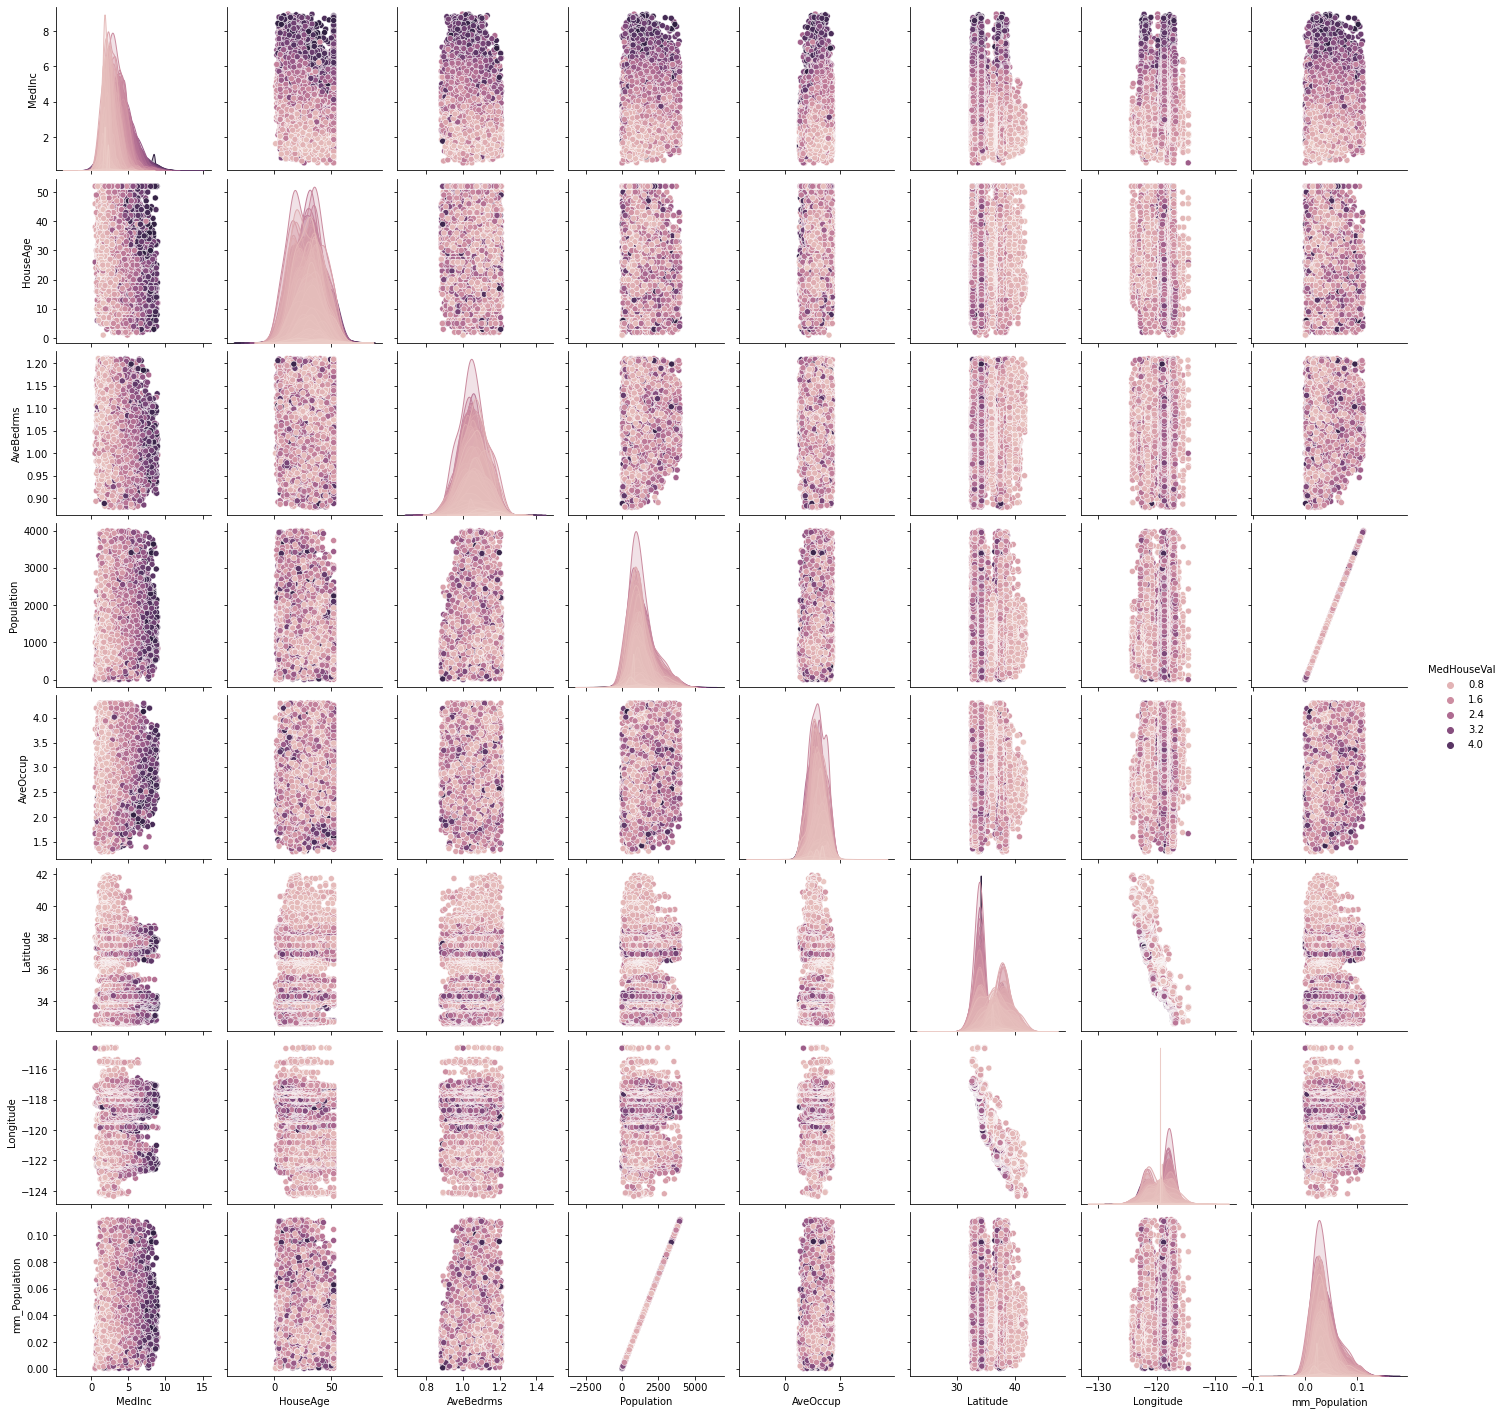

In [27]:
# Step 6. Getting a DecisionTree score
sns.pairplot(data=df, hue='MedHouseVal', diag_kind="kde")

In [40]:
from sklearn.tree import DecisionTreeRegressor

for n in range(15, 25, 3):
    for m in range(15, 25, 3):
        print(m,n)
        dtc = DecisionTreeRegressor(max_depth=n, min_samples_split=m) 
        get_score(X_train[['Latitude', 'Longitude', 'MedInc']], X_test[['Latitude', 'Longitude', 'MedInc']], y_train, y_test, dtc)
        

15 15
score : 0.7302704032831584
18 15
score : 0.7312888565664156
21 15
score : 0.736062772739885
24 15
score : 0.7389647639387568
15 18
score : 0.7266556133381111
18 18
score : 0.728633706078335
21 18
score : 0.73448172157073
24 18
score : 0.7386995888663657
15 21
score : 0.725018627683101
18 21
score : 0.7287559592655148
21 21
score : 0.7337628092293433
24 21
score : 0.7383299722640579
15 24
score : 0.7249686845514309
18 24
score : 0.7281710585817716
21 24
score : 0.7339409155788146
24 24
score : 0.7377267111725119


<b>Лучшие параметры max_depth =  24 , min_samples_split = 15</b>

score : 0.7255400595930765


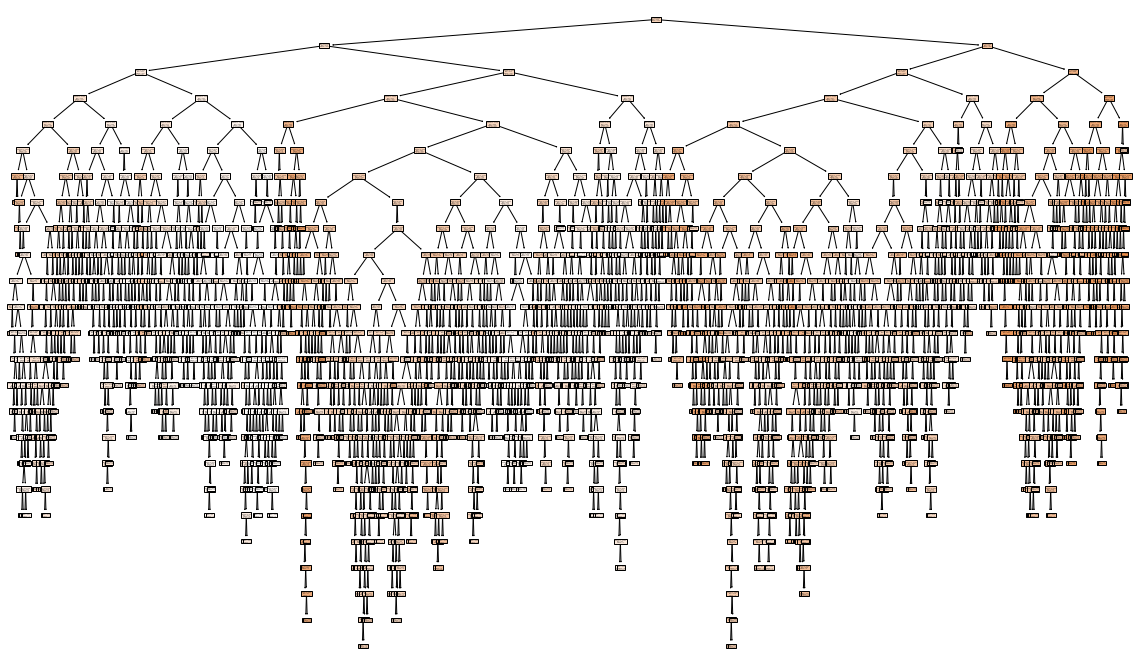

In [53]:
dtc = DecisionTreeRegressor(max_depth=24, min_samples_split=15) 
get_score(X_train[['Latitude', 'Longitude', 'MedInc']], X_test[['Latitude', 'Longitude', 'MedInc']], y_train, y_test, dtc)

from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 12))
plot_tree(dtc, feature_names=['Latitude', 'Longitude', 'MedInc'], filled=True);

|                 |   score |
|-----------------|---------|
|linear regression|   ~58 % |
|decision tree    |   ~65 % |

<b>Выводы: </b>
- Дерево решений может являться предпочтительным решением , когда необходимо понять почему именно такое решение предложила модель, т.к. дерево решений может давать визульно представимое решение (собсвтенно само дерево).
- Линейная регрессия показывает плохой результат, когда нет линейной зависимости между параметрами и целевой переменной.
- В свою очередб дерево решений очень чувствительно к изменеию данных и требует сбалансированное количетсво  данных для каждого целевого значения